In [1]:
# 分别导入numpy、matplotlib以及pandas，用于数学运算、作图以及数据分析。
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 使用pandas分别读取训练数据与测试数据集。
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

# 从训练与测试数据集上都分离出64维度的像素特征与1维度的数字目标。
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]

X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# 从sklearn.cluster中导入KMeans模型。
from sklearn.cluster import KMeans

# 初始化KMeans模型，并设置聚类中心数量为10。
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)

# 逐条判断每个测试图像所属的聚类中心。
y_pred = kmeans.predict(X_test)


In [2]:
# 从sklearn导入度量函数库metrics。
from sklearn import metrics
# 使用ARI进行KMeans聚类性能评估。
print(metrics.adjusted_rand_score(y_test, y_pred))


0.6592893679369013


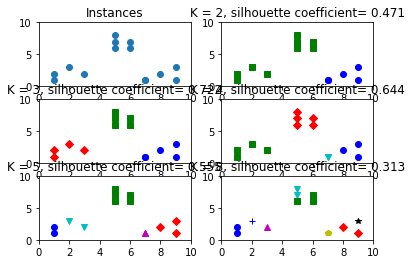

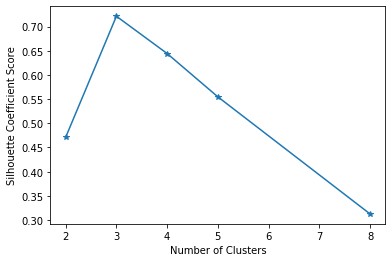

In [3]:

# 从sklearn.cluster中导入KMeans算法包。
from sklearn.cluster import KMeans
# 从sklearn.metrics导入silhouette_score用于计算轮廓系数。
from sklearn.metrics import silhouette_score

# 分割出3*2=6个子图，并在1号子图作图。
plt.subplot(3,2,1)

# 初始化原始数据点。
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# 在1号子图做出原始数据点阵的分布。
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

clusters = [2, 3, 4, 5, 8]
subplot_counter = 1
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)

# 绘制轮廓系数与不同类簇数量的直观显示图。
    plt.title('K = %s, silhouette coefficient= %0.03f' %(t, sc_score))
    
# 绘制轮廓系数与不同类簇数量的关系曲线。
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()


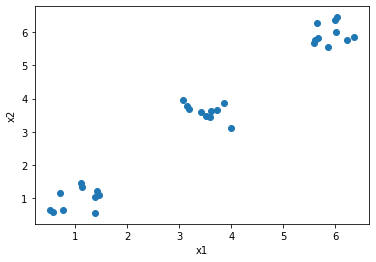

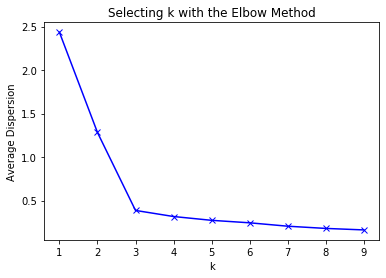

In [4]:
# 导入必要的工具包。
from scipy.spatial.distance import cdist

# 使用均匀分布函数随机三个簇，每个簇周围10个数据样本。
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(5.5, 6.5, (2, 10))
cluster3 = np.random.uniform(3.0, 4.0, (2, 10))

# 绘制30个数据样本的分布图像。
X = np.hstack((cluster1, cluster2, cluster3)).T
plt.scatter(X[:,0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# 测试9种不同聚类中心数量下，每种情况的聚类质量，并作图。
K = range(1, 10)
meandistortions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()
